## A look at the different images sizes within each data set. This can predict a good starting image size for the model

In [45]:
import pandas as pd
import matplotlib.pyplot  as plt
from pathlib import Path
import imagesize
from PIL import Image
%matplotlib inline

In [46]:
# This code for this cell and the next came from: https://medium.com/analytics-vidhya/how-to-pick-the-optimal-image-size-for-training-convolution-neural-network-65702b880f05
# accessed 2023_09_02

root = 'data/raw/images/val/'

# Get the Image Resolutions
imgs_jpeg = [img.name for img in Path(root).iterdir() if img.suffix == '.jpeg']
img_meta = {}

imgs_jpg = [img.name for img in Path(root).iterdir() if img.suffix == '.jpg']
imgs_png = [img.name for img in Path(root).iterdir() if img.suffix == '.png']
imgs_JPG = [img.name for img in Path(root).iterdir() if img.suffix == '.JPG']
imgs = imgs_jpeg + imgs_jpg + imgs_png + imgs_JPG
for f in imgs: img_meta[str(f)] = imagesize.get(root+f)


In [47]:
# Convert it to dataframe and compute aspect ratio
img_meta_df_val = pd.DataFrame.from_dict([img_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns', copy=False)
img_meta_df_val[['Width', 'Height']] = pd.DataFrame(img_meta_df_val['Size'].tolist(), index=img_meta_df_val.index)
img_meta_df_val['Aspect Ratio'] = round(img_meta_df_val['Width'] / img_meta_df_val['Height'], 2)

img_meta_df_val.shape

(7500, 5)

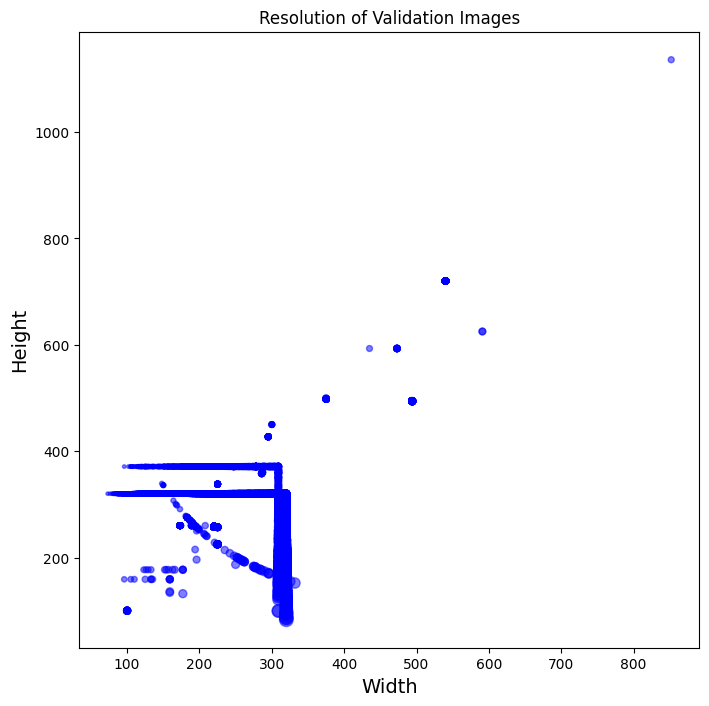

In [48]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
points = ax.scatter(img_meta_df_val.Width, img_meta_df_val.Height, color='blue', alpha=0.5, s=img_meta_df_val['Aspect Ratio']*100, picker=True, marker='.')
_ = ax.set_title('Resolution of Validation Images')
_ = ax.set_xlabel('Width', size=14)
_ = ax.set_ylabel('Height', size=14)

### The plot above shows that 300x300 may be a good starting point for the size of each image

In [49]:
img_meta_df_val[img_meta_df_val['Height'] > 1000]

,FileName,Size,Width,Height,Aspect Ratio
5772,3861.jpeg,"(852, 1136)",852,1136,0.75


### Largest image in both height and width in the validation set:

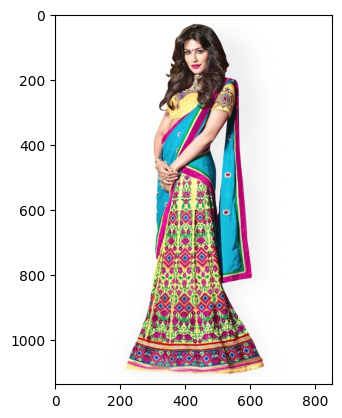

In [50]:
img = Image.open('data/raw/images/val/3861.jpeg')
_ = plt.imshow(img)

In [51]:
img_meta_df_val.Width.mean(), img_meta_df_val.Height.mean()

(263.6944, 365.51533333333333)

### Now the test set

In [52]:
# This code for this cell and the next came from: https://medium.com/analytics-vidhya/how-to-pick-the-optimal-image-size-for-training-convolution-neural-network-65702b880f05
# accessed 2023_09_02

root = 'data/raw/images/test/'

# Get the image resolutions
imgs_jpeg = [img.name for img in Path(root).iterdir() if img.suffix == ".jpeg"]
img_meta = {}

imgs_jpg = [img.name for img in Path(root).iterdir() if img.suffix == ".jpg"]
imgs_png = [img.name for img in Path(root).iterdir() if img.suffix == ".png"]
imgs_JPG = [img.name for img in Path(root).iterdir() if img.suffix == ".JPG"]
imgs = imgs_jpeg + imgs_jpg + imgs_png + imgs_JPG
for f in imgs: img_meta[str(f)] = imagesize.get(root+f)

In [53]:
# Convert it to df and compute aspect ratio
img_meta_df_test = pd.DataFrame.from_dict([img_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns', copy=False)
img_meta_df_test[["Width", "Height"]] = pd.DataFrame(img_meta_df_test["Size"].tolist(), index=img_meta_df_test.index)
img_meta_df_test["Aspect Ratio"] = round(img_meta_df_test["Width"] / img_meta_df_test["Height"], 2)

img_meta_df_test.shape

(7500, 5)

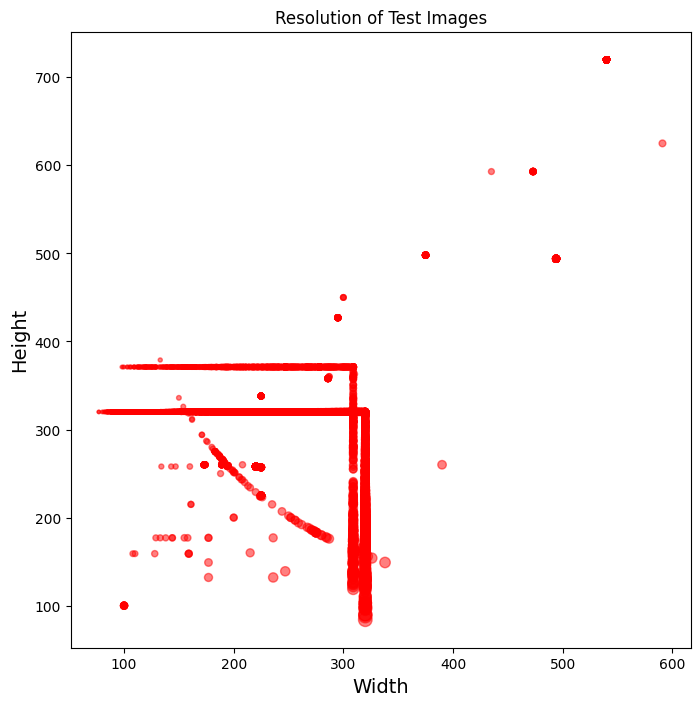

In [54]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
points = ax.scatter(img_meta_df_test.Width, img_meta_df_test.Height, color='r', alpha=0.5, s=img_meta_df_test["Aspect Ratio"]*100, picker=True, marker='.')
_ = ax.set_title('Resolution of Test Images')
_ = ax.set_xlabel('Width', size=14)
_ = ax.set_ylabel('Height', size=14)

### The plot above again shows that 300x300 may be a good starting point for the size of each image.

In [55]:
large_height = img_meta_df_test[img_meta_df_test['Height'] > 700]
large_height.head()

,FileName,Size,Width,Height,Aspect Ratio
13,5305.jpeg,"(540, 720)",540,720,0.75
17,5755.jpeg,"(540, 720)",540,720,0.75
18,5240.jpeg,"(540, 720)",540,720,0.75
19,2585.jpeg,"(540, 720)",540,720,0.75
21,5610.jpeg,"(540, 720)",540,720,0.75


In [56]:
len(large_height)

1156

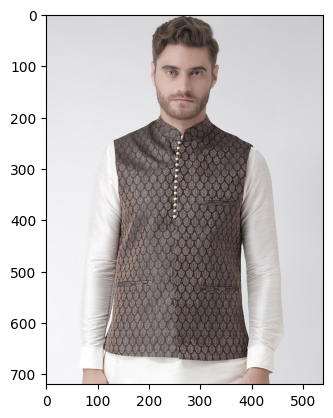

In [57]:
img = Image.open('data/raw/images/test/5305.jpeg')
_ = plt.imshow(img)

In [58]:
large_width = img_meta_df_test[img_meta_df_test['Width'] > 550]
large_width.head()

,FileName,Size,Width,Height,Aspect Ratio
7457,5649.jpg,"(591, 625)",591,625,0.95


### Image in test data set with largest width:

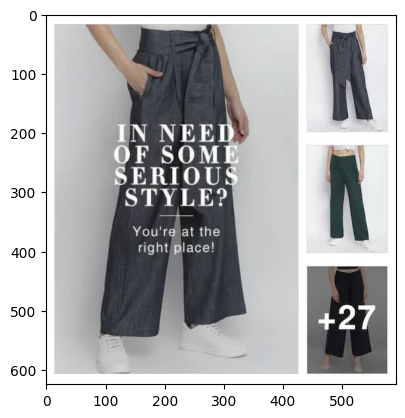

In [59]:
img = Image.open('data/raw/images/test/5649.jpg')
_ = plt.imshow(img)

In [60]:
img_meta_df_test.Width.mean(), img_meta_df_test.Height.mean()

(264.97973333333334, 368.1562666666667)

### Now the training set

In [61]:
# This code for this cell and the next came from: https://medium.com/analytics-vidhya/how-to-pick-the-optimal-image-size-for-training-convolution-neural-network-65702b880f05
# accessed 2023_09_02

root = 'data/raw/images/train/'

# Get the image resolutions
imgs_jpeg = [img.name for img in Path(root).iterdir() if img.suffix == ".jpeg"]
img_meta = {}

imgs_jpg = [img.name for img in Path(root).iterdir() if img.suffix == ".jpg"]
imgs_png = [img.name for img in Path(root).iterdir() if img.suffix == ".png"]
imgs_JPG = [img.name for img in Path(root).iterdir() if img.suffix == ".JPG"]
imgs = imgs_jpeg + imgs_jpg + imgs_png + imgs_JPG
for f in imgs: img_meta[str(f)] = imagesize.get(root+f)

In [62]:
# Convert it to df and compute aspect ratio
img_meta_df_train = pd.DataFrame.from_dict([img_meta]).T.reset_index().set_axis(['FileName', 'Size'], axis='columns', copy=False)
img_meta_df_train[["Width", "Height"]] = pd.DataFrame(img_meta_df_train["Size"].tolist(), index=img_meta_df_train.index)
img_meta_df_train["Aspect Ratio"] = round(img_meta_df_train["Width"] / img_meta_df_train["Height"], 2)

img_meta_df_train.shape

(91166, 5)

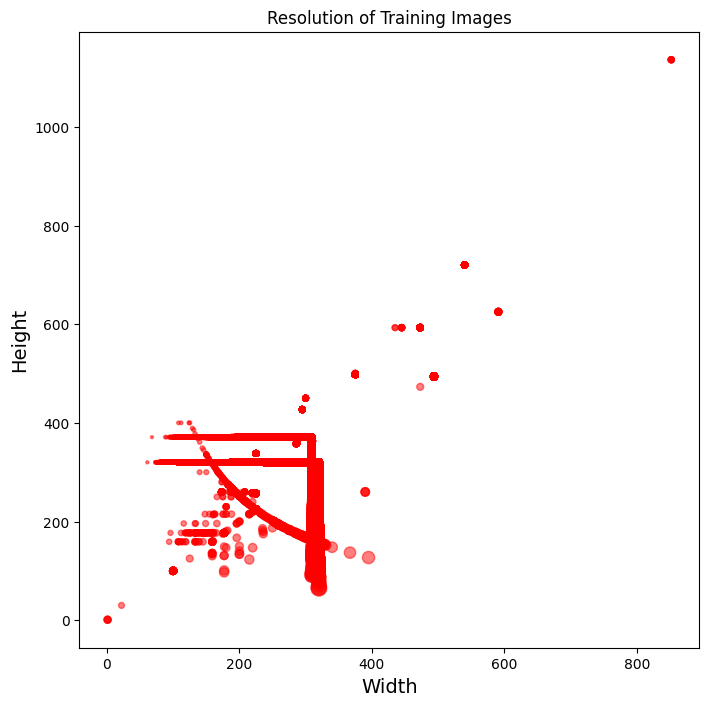

In [63]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)
points = ax.scatter(img_meta_df_train.Width, img_meta_df_train.Height, color='r', alpha=0.5, s=img_meta_df_train["Aspect Ratio"]*100, picker=True, marker='.',)
_ = ax.set_title('Resolution of Training Images')
_ = ax.set_xlabel('Width', size=14)
_ = ax.set_ylabel('Height', size=14)

### The plot above shows the training set is similar to the test and valdiation sets.

In [64]:
large_height = img_meta_df_train[img_meta_df_train['Height'] > 1000]
large_height.head()

,FileName,Size,Width,Height,Aspect Ratio
12716,66026.jpeg,"(852, 1136)",852,1136,0.75
38644,53285.jpeg,"(852, 1136)",852,1136,0.75
52040,66146.jpeg,"(852, 1136)",852,1136,0.75
61704,52910.jpeg,"(852, 1136)",852,1136,0.75
77195,66419.jpeg,"(852, 1136)",852,1136,0.75


In [65]:
large_height.shape

(7, 5)

In [66]:
large_width = img_meta_df_train[img_meta_df_train['Width'] > 800]
large_width.head()

,FileName,Size,Width,Height,Aspect Ratio
12716,66026.jpeg,"(852, 1136)",852,1136,0.75
38644,53285.jpeg,"(852, 1136)",852,1136,0.75
52040,66146.jpeg,"(852, 1136)",852,1136,0.75
61704,52910.jpeg,"(852, 1136)",852,1136,0.75
77195,66419.jpeg,"(852, 1136)",852,1136,0.75


In [67]:
len(large_width)

7

### One of the images in training data set with largest width:

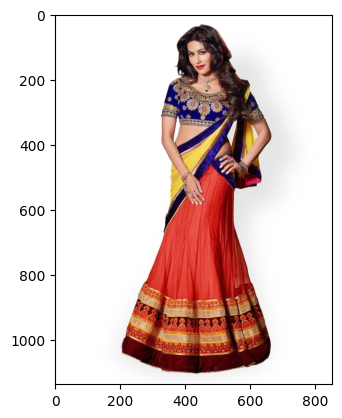

In [68]:
img = Image.open('data/raw/images/train/52910.jpeg')
_ = plt.imshow(img)

In [69]:
img_meta_df_train.Width.mean(), img_meta_df_train.Height.mean()

(247.07397494680035, 365.67377092337057)

## All of the plots show great variation in image size. However, all of them indicate that 300x300 is a reasonable size to start with.